# Common distributions in particle physics


In [1]:
import numpy as np
import pandas as pd

from random import seed 
from random import gauss 
from random import uniform
import matplotlib.pyplot as plt
from scipy.stats import binom
from scipy.stats import randint
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import uniform

# Binomial pmf

- Consider an experiment consisting of $N$ independent trials, each with two possible results: 'success' and 'failure'
    - probability for success in each trial is a constant, $P$. 
    - experiment characterised by $n$ (total number of successes). 
- Repeat experiment $N_{exps}$ times
    - $n$ would occur with relative frequencies ($P(n)$) given by the **binomial pmf**.
    
- **Binomial pmf**: 
 $$  f (n; N, P) = \frac{N!}{n!(N - n)!} P^{n} (1-P)^{N-n} $$
 
- Nice and intuitive derivation in Cowan section 2.1

- Special case of **multinomial** pmf with arbitrary number of possible results.


In [2]:
#binomial distribution
P = 0.5 # unbiased coin

N_exps = 5000
N_tosses = 5000

trials = np.random.rand(N_exps,N_tosses) # array of uniform random number between 0 and 1
counts = np.where(trials < P, 1, 0) # corresponding array: 1 for trials with x < P, 0 for all others
results = np.sum(counts, axis=1) # sum across rows to get vector of number of observations in each experiment

<Figure size 432x288 with 0 Axes>

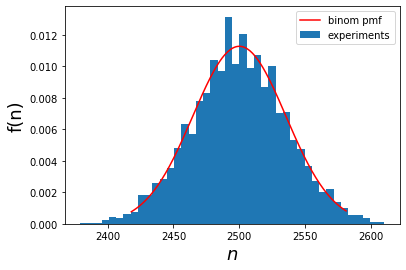

In [3]:
plt.figure()
fig, ax = plt.subplots(1, 1)
x = np.arange(binom.ppf(0.01, N_tosses, P), binom.ppf(0.99, N_tosses, P))
ax.plot(x, binom.pmf(x, N_tosses, P), 'r-',  label='binom pmf')
h = plt.hist(results, bins='auto',density=True, label='experiments')
labelx = ax.set_xlabel("$n$", fontsize = 18)
labely = ax.set_ylabel("f(n)", fontsize = 18)
plt.legend()
plt.show()

# Poisson pmf

- What if the number of trials $N$ is very large but the probaility of "success" P is very small such that $\nu = PN$ is some finite number
- In this limit, the binomial pmf simplifes to 

 $$  f (n; \nu) = \frac{\nu^{n}}{n!} e^{-\nu} $$
 
- This is the **Poisson pmf** an incredibly important pdf to particle, nuclear, and high energy physics


# Why is the poisson pmf so important?

- Large number of trials with small probability of "success" describes almost all particle physics experiments
- Radioactive decay: 
  - detector is read at high frequency for decay signal
  - each trial has low probability for observing decay
  - but the number of expected detected decays after a time **t** is finite

In [4]:
%time
P = 0.0001 # low probability of observation
N_trials = 100000 # but large number of 'trials'
N_exps = 1000 # repeating the experiment 

trials = np.random.rand(N_exps,N_trials) # array of uniform random number between 0 and 1
counts = np.where(trials < P, 1, 0) # corresponding array: 1 for trials with x < P, 0 for all others
results = np.sum(counts, axis=1) # sum across rows to get vector of number of observations in each experiment

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs


10.0


<Figure size 432x288 with 0 Axes>

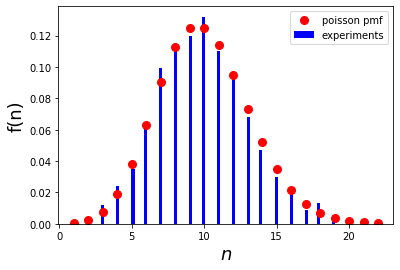

In [5]:
mu = N_trials*P

unResults = np.unique(results) # we extract the set values the result can assume to help us plot the pmf

dataCounts, dataBins = np.histogram(results, bins=100)
dataCountsNorm = dataCounts/(np.sum(dataCounts)) # for pmf, sum of counts must equal 1
binCentres = (dataBins[:-1] + dataBins[1:]) / 2
width = np.diff(dataBins)

plt.figure()
fig, ax = plt.subplots(1, 1)
plt.bar(binCentres, dataCountsNorm, align='center', width=width, label='experiments', color='b')
print(mu)
#x= np.linspace(2400,2600,201)
#print(x) 
ax.plot(unResults, poisson.pmf(unResults, mu),'ro', ms=8, label='poisson pmf')
labelx = ax.set_xlabel("$n$", fontsize = 18)
labely = ax.set_ylabel("f(n)", fontsize = 18)
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

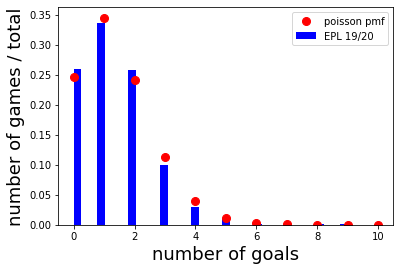

In [6]:
df_epl = pd.read_csv("epl2020.csv")
results = np.array(df_epl["scored"])
unResults = np.unique(results) # we extract the set values the result can assume to help us plot the pmf

dataCounts, dataBins = np.histogram(results, bins=35)
dataCountsNorm = dataCounts/(np.sum(dataCounts)) # for pmf, sum of counts must equal 1
binCentres = (dataBins[:-1] + dataBins[1:]) / 2
width = np.diff(dataBins)

mu = 1.4 # an educated guess...I watch a lot of football

plt.figure()
fig, ax = plt.subplots(1, 1)
x = np.arange(poisson.ppf(0.001, mu), poisson.ppf(0.9999999, mu))
ax.plot(x, poisson.pmf(x, mu), 'ro', ms=8, label='poisson pmf')
plt.bar(binCentres, dataCountsNorm, align='center', width=width, label='EPL 19/20', color='b')
labelx = ax.set_xlabel("number of goals", fontsize = 18)
labely = ax.set_ylabel("number of games / total", fontsize = 18)
plt.legend()
plt.show()

# The 'classic' poisson example: death by Prussian horse kick

- In a classic example, Bortkiewicz (1898) studied the distribution of... 
    - **122 men kicked to death by horses among ten Prussian army corps over 20 years.**
- In most years in most corps, no one dies from being kicked; in one corp in one year, four men were kicked to death.
   - Does this mean something was amiss in this particular corp?  

In [7]:
dfPrussianHorses = pd.read_table("HorseKicks.txt")
dfPrussianHorsesData = dfPrussianHorses.iloc[:, 1:15]
data = dfPrussianHorsesData.to_numpy().ravel()
dfPrussianHorses

,Year,GC,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C14,C15
0,1875,0,0,0,0,0,0,0,1,1,0,0,0,1,0
1,1876,2,0,0,0,1,0,0,0,0,0,0,0,1,1
2,1877,2,0,0,0,0,0,1,1,0,0,1,0,2,0
3,1878,1,2,2,1,1,0,0,0,0,0,1,0,1,0
4,1879,0,0,0,1,1,2,2,0,1,0,0,2,1,0
5,1880,0,3,2,1,1,1,0,0,0,2,1,4,3,0
6,1881,1,0,0,2,1,0,0,1,0,1,0,0,0,0
7,1882,1,2,0,0,0,0,1,0,1,1,2,1,4,1
8,1883,0,0,1,2,0,1,2,1,0,1,0,3,0,0
9,1884,3,0,1,0,0,0,0,1,0,0,2,0,1,1


<Figure size 432x288 with 0 Axes>

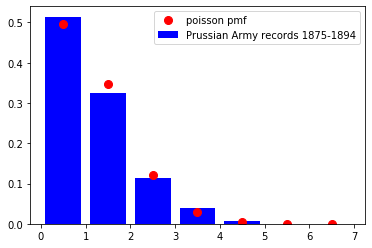

In [8]:
plt.figure()
fig, ax = plt.subplots(1, 1)
unResults = np.unique(dfPrussianHorsesData)

bins = [x for x in range(8)]

dataCounts, dataBins = np.histogram(data, bins=bins)
dataCountsNorm = dataCounts/(np.sum(dataCounts)) # for pmf, sum of counts must equal 1
binCentres = (dataBins[:-1] + dataBins[1:]) / 2

poisBins = bins[0:7]
ax.plot(binCentres, poisson.pmf(poisBins, 0.7), 'ro', ms=8, label='poisson pmf')
plt.bar(binCentres, dataCountsNorm, align='center', label='Prussian Army records 1875-1894', color='b')
plt.legend()

# Uniform pdf


0.5
0.28867513459481287


<Figure size 432x288 with 0 Axes>

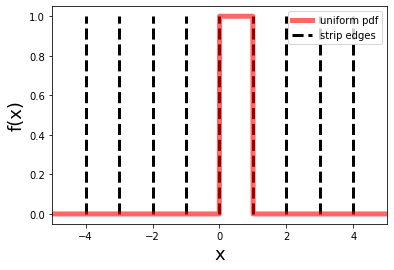

In [9]:
n = 100000
result = np.random.uniform(0, 1, n) #uniform

plt.figure()
fig, ax = plt.subplots(1, 1)
fr = uniform()

x = np.linspace(-5.0,5,1000)
#ax.plot(x, fr(x), 'ro', ms=8, label='uniform pdf')

ax.plot(x, fr.pdf(x),'r-', lw=5, alpha=0.6, label='uniform pdf')

ax.set_xlim(-5.0, 5.0)
#plt.hist(result, bins ='auto', density = True, label='uniform random numbers', color='b')


plt.vlines(-1.0, 0.0, 1.0, linewidth=3.0, linestyle="dashed")
plt.vlines(-2.0, 0.0, 1.0, linewidth=3.0, linestyle="dashed")
plt.vlines(-3.0, 0.0, 1.0, linewidth=3.0, linestyle="dashed")
plt.vlines(-4.0, 0.0, 1.0, linewidth=3.0, linestyle="dashed")
plt.vlines(0.0, 0.0, 1.0, linewidth=3.0, linestyle="dashed", label="strip edges")
plt.vlines(1.0, 0.0, 1.0, linewidth=3.0, linestyle="dashed")
plt.vlines(2.0, 0.0, 1.0, linewidth=3.0, linestyle="dashed")
plt.vlines(3.0, 0.0, 1.0, linewidth=3.0, linestyle="dashed")
plt.vlines(4.0, 0.0, 1.0, linewidth=3.0, linestyle="dashed")


labelx = ax.set_xlabel("x", fontsize = 18)
labely = ax.set_ylabel("f(x)", fontsize = 18)
plt.legend()

print(fr.mean())
print(fr.std())

# Gaussian (normal) pdf

$$  f(x; \mu, \sigma^{2}) = \frac{1}{\sqrt{2\pi\sigma^{2}}} \exp \big(  \frac{-(x-\mu)^{2}}{2\sigma^{2}} \big)$$
- $\mu$ and $\sigma$ are the mean and standard deviation respectively


# Gaussian (normal) pdf
- We see Gaussian distributions again, again and again...Why?
- **Central Limit Theorem**:
 -  sum of $n$ independent continuous random variables $x_i$ with means $\mu_i$ and variances $\sigma_i$ **becomes a Gaussian random variable** with mean $\mu = \sum^{n}_{i=1} \mu_{i}$ and variance $\sigma^{2} = \sum^{n}_{i=1} \sigma_{i}^{2}$ in the limit that $n$ approaches infinity 
- **Doesn't matter how the variables are distributed!!**

In [42]:
#Demo of Central Limit Theorem
# n random numbers, each distributed according to some arbitrary, continuous pdf, N = sum(n)
n  = 35
n_exps = 10000

nums = np.array([])
sums = np.array([])

dfCLT = pd.DataFrame()

for i in range(0,n_exps):
    #result = np.random.uniform(0, 1, n) #uniform
    #result = np.random.standard_exponential(n) #exponential
    #result = np.random.power(1.5, n) #power law
    result  = np.random.uniform(0, 1, n) + np.random.standard_exponential(n) + np.random.power(1.5, n)

    nums = np.append(nums, result)
    sum = np.sum(result)
    sums = np.append(sums, sum)

numsR = nums.reshape(n_exps,n)

dfCLT = pd.DataFrame(numsR,dtype=None, copy=False)
dfCLT["sum"] = sums
dfCLT

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,sum
0,3.794515,0.792060,2.633163,1.225665,2.670742,1.217623,2.467219,1.127275,3.622701,1.723315,...,4.007043,0.611085,2.879183,2.798430,1.364085,1.550850,2.074945,1.769737,0.692280,74.677313
1,1.439000,2.271105,2.128236,2.276037,2.138680,2.008172,2.286797,1.832697,2.110945,3.024268,...,2.552703,2.237493,1.615206,4.103930,2.218970,1.599618,2.344579,0.856632,3.037801,82.305308
2,1.988460,4.418340,3.663485,2.750089,1.058884,2.554474,2.353366,1.984115,2.328726,1.386963,...,2.559936,1.735275,2.454285,1.710316,2.206606,3.067565,2.181656,1.478968,1.786202,78.545067
3,1.231766,1.026858,2.110948,3.149236,1.719734,2.063889,1.265932,1.521289,4.471666,0.538644,...,1.398982,1.641586,2.614936,3.252335,2.120668,2.235968,1.308458,2.821781,2.398652,70.329908
4,1.392428,2.353204,1.318137,4.868855,1.921467,1.122056,0.976401,1.154905,1.218552,2.198844,...,1.270777,1.805868,1.481087,1.656624,2.439563,1.322910,1.319464,3.174549,3.769228,73.126448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.387990,1.995919,1.305984,2.110987,1.422073,2.338059,1.666173,1.875874,1.493364,2.783974,...,1.651359,3.707131,3.383114,2.743183,1.991729,1.588792,2.440448,1.663857,3.401251,69.800763
9996,2.981641,1.198039,1.414233,1.366571,3.449577,3.831885,1.390504,2.001912,3.138710,0.881935,...,2.440476,0.614547,2.870875,1.817805,0.868522,1.548416,1.950310,1.558804,4.698881,72.579863
9997,3.057164,2.907368,1.554359,1.853961,1.145943,1.713797,0.992477,2.437134,1.850643,2.038943,...,4.570049,2.453568,2.839558,2.498637,4.033430,3.448915,1.782541,1.340133,1.029908,76.028867
9998,4.376484,0.876628,3.118795,2.104588,1.654827,0.953736,2.337377,2.899059,4.245777,1.472629,...,1.535716,1.905598,2.497116,2.696442,2.824432,1.599799,1.459052,1.355704,4.321768,78.137451


<Figure size 432x288 with 0 Axes>

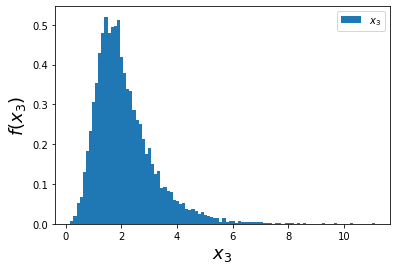

In [43]:
plt.figure()
fig, ax = plt.subplots(1, 1)

text = "$x_3$"
#distribution of the 3rd random number as an example
h = plt.hist(dfCLT.iloc[:,13], bins='auto', density=True, label=text)
labelx = ax.set_xlabel("$x_3$", fontsize = 18)
labely = ax.set_ylabel("$f(x_3)$", fontsize = 18)
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

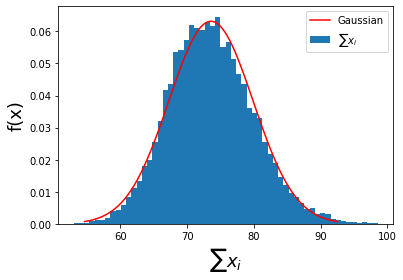

In [44]:
plt.figure()
fig, ax = plt.subplots(1, 1)

text = "$\sum x_{i}$"
h = plt.hist(dfCLT["sum"], bins='auto', density=True, label=text)
mu = np.mean(dfCLT["sum"])
std = np.std(dfCLT["sum"])
x = np.linspace(mu-(3*std), mu+(3*std),100)

ax.plot(x, norm.pdf(x,mu, std), 'r-', ms=8, label='Gaussian')
labelx = ax.set_xlabel("$\sum x_{i}$", fontsize = 18)
labely = ax.set_ylabel("f(x)", fontsize = 18)
plt.legend()
plt.show()

# Central Limit Theorem

 - Formal justification for treating measurement uncertainties as Gaussian-distributed random variables 
 - Assumes total uncertainty is the sum of a large number of small contributions
 
- **Many random variables summing together to produce our variable of interest is typical of particle physics!**

# Crystall ball pdf

- 

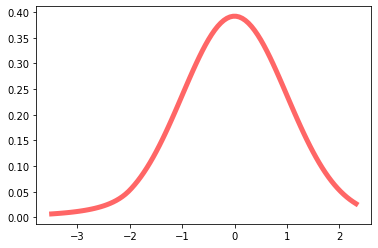

In [12]:
from scipy.stats import crystalball
beta, m = 2, 3
mean, var, skew, kurt = crystalball.stats(beta, m, moments='mvsk')

fig, ax = plt.subplots(1, 1)

x = np.linspace(crystalball.ppf(0.01, beta, m), crystalball.ppf(0.99, beta, m), 100)

ax.plot(x, crystalball.pdf(x, beta, m), 'r-', lw=5, alpha=0.6, label='crystalball pdf')

# Multinomial pmf

- What if the experiment had $m$ possible outcomes instead of 2? e.g, rolling a die?

- Consider the experiment of rolling a **unbiased** die $N$ times
    - 6 possible results $x_i = \left\{ 1 \dots 6 \right\}$ each with equal probilities $P_i = 1/6$ as $\sum_i P_i =1$
    
- Repeat experiment $N_{exps}$ times
    - $n$ would occur with relative frequencies ($P(n)$) given by the **multinomial pmf**.

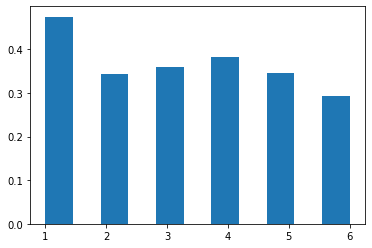

In [13]:
r = randint.rvs(1, 7, size=N_exps)

plt.figure()
h = plt.hist(r, bins='auto',density=True, label='scores')
plt.show()